## Motivation
We want to train an algorithm to classify images as being dogs or cats.

## Problem
We need a dataset to do this. We will get data from the [Unsplash Image API](https://unsplash.com/developers).

## Caveats
Sometimes, raw data is unsuitable for machine learning algorithms. For instance, we may want:
- Only images that are landscape (i.e. width > height)
- All our images to be of the same resolution

---
## Step 1: Get cat and dog image URLs from the API
We will use the [`search/photos` GET method](https://unsplash.com/documentation#search-photos).

In [23]:
import requests as re

# API variables
root_endpoint = 'https://api.unsplash.com/' 
client_id = 'dZAXqQ7AEOsa9Y0Gw4hYRiBc-Kb1qVzNs7wHHhiPF9c' #Hardcoding

# Convenience function for making API calls and grabbing results
def search_photos(search_term):
    api_method = 'search/photos' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint,  #use endpoint and all the parameters we need in a dictionary
                      params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
    if status_code != 200:
        print(f'Bad status code: {status_code}')
    
    image_urls = []
    for img in result['results']:
        img_url = img['urls']['small']
        image_urls.append(img_url)
    
    return image_urls

In [24]:
dog_urls = search_photos('dog')
cat_urls = search_photos('cat')

In [34]:
#import pprint

#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(result)

In [36]:
from IPython.display import JSON

response = re.get('https://api.unsplash.com/search/photos', 
                  params={'query': 'desk', 'per_page': 30, 'client_id': client_id})
result = response.json()
JSON(result)

<IPython.core.display.JSON object>

{'raw': 'https://images.unsplash.com/photo-1518655048521-f130df041f66?ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkZXNrfGVufDB8fHx8MTYyNjk2NjQ3Mg&ixlib=rb-1.2.1',
 'full': 'https://images.unsplash.com/photo-1518655048521-f130df041f66?crop=entropy&cs=srgb&fm=jpg&ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkZXNrfGVufDB8fHx8MTYyNjk2NjQ3Mg&ixlib=rb-1.2.1&q=85',
 'regular': 'https://images.unsplash.com/photo-1518655048521-f130df041f66?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkZXNrfGVufDB8fHx8MTYyNjk2NjQ3Mg&ixlib=rb-1.2.1&q=80&w=1080',
 'small': 'https://images.unsplash.com/photo-1518655048521-f130df041f66?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkZXNrfGVufDB8fHx8MTYyNjk2NjQ3Mg&ixlib=rb-1.2.1&q=80&w=400',
 'thumb': 'https://images.unsplash.com/photo-1518655048521-f130df041f66?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkZXNrfGVufDB8fHx8MTYyNjk2NjQ3Mg&ixlib=rb-1.2.1&q=80&w=200'}

---
## Step 2: Download  the images from the URLs
(Step 2a: Google [how to download an image from a URL in Python](https://stackoverflow.com/a/40944159))

We'll just define the function to download an image for now. Later on, we'll use it on images one at a time (but after doing some processing).

In [37]:
from PIL import Image

def download_image(url):
    image = Image.open(re.get(url, stream=True).raw)
    return image

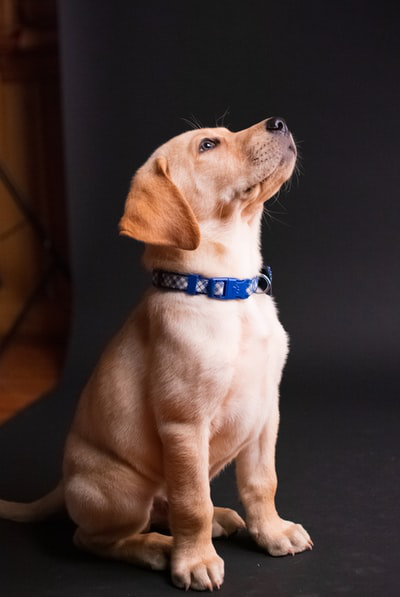

In [41]:
test_img = download_image(dog_urls[4])
test_img

In [43]:
is_landscape(test_img)

False

---
## Step 3: Download and save images that meet our requirements
We'll need to know how to work with the [PIL Image data type](https://pillow.readthedocs.io/en/stable/reference/Image.html), which is what our `download_image(url)` function returns. Namely, we need to be able to a) get it's resolution and b) resize it.

In [48]:
import os


def is_landscape(image):
    return image.width > image.height


def save_category_images(urls, category_name, resolution=(256, 256)): #Helpful to have same resolution
    save_folder = f'saved_images/{category_name}'
    if not os.path.exists(save_folder): #if doesn't exist, from your directory in Python
        os.mkdir(save_folder) #Create folder
        
    for i, url in enumerate(urls):
        image = download_image(url)
        if is_landscape(image):
            image = image.resize(resolution)
            filename = f'{i}.jpg'
            save_path = os.path.join(save_folder, filename) 
            image.save(save_path)

In [49]:
save_category_images(dog_urls, 'dogs')
save_category_images(cat_urls, 'cats')

In [47]:
example_list = ["a", 'b', "c", "d", "e"]

for i, element in enumerate(example_list):
    print(i, element)

0 a
1 b
2 c
3 d
4 e
